<a href="https://colab.research.google.com/github/calistasalscpw/Project-Analisis-Data/blob/main/Proyek_Analisis_Data_Calista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Calista Salsabila Citra Putri Winanto
- **Email:** calistasalsa.cpw@gmail.com
- **ID Dicoding:** M314B4KX0888

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran kepuasan pelanggan terhadap produk yang disediakan?
- Bagaimana tingkat pemasukan dari tahun ke tahun dan bulan?

## Import Semua Packages/Library yang Digunakan

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel order_reviews dengan DataFrame

In [128]:
reviews_df = pd.read_csv("/content/E-Commerce Public Dataset/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Memuat tabel order_items_dataset

In [129]:
items_df = pd.read_csv("/content/E-Commerce Public Dataset/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Memuat table order_payments_dataset

In [130]:
payments_df = pd.read_csv("/content/E-Commerce Public Dataset/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Karena ingin mengetahui persebaran kepuasan pelanggan, maka review_score dari `reviews_df` akan berperan penting pada tahap-tahap selanjutnya.
- Karena ingin mengetahui persebaran harga pembelian produk, maka kolom price pada `items_df` akan berperan penting pada tahap-tahap selanjutnya.

### Assessing Data

Menilai data pada `reviews_df` dan `items_df` untuk mengetahui tipe-tipe data pada tiap kolom.

In [131]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


1. Pada kolom review_creation_date dan review_answer_timestamp, data type nya seharusnya datetime, bukan object.
2. Pada kolom review_comment_title dan review_comment_message, terdapat perbedaan jumlah data dibandingkan dengan kolom-kolom lain, sehingga dapat disimpulkan bahwa terdapat missing values pada kedua kolom tersebut. Oleh karena itu, perlu dipastikan missing values pada kedua kolom tersebut.

In [132]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Hal ini menunjukkan bahwa terdapat 87656 missing values pada kolom review_comment_title dan 58247 pada review_comment_message dari total data keseluruhan yang seharusnya berjumlah 99224, sehingga nanti perlu dibersihkan.

In [133]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Sedangkan pada tabel `items_df`, seluruh jumlah data pada setiap kolom berjumlah sama, sehingga dapat disimpulkan bahwa tidak ada missing values pada kolom ini. Akan tetapi, pada shipping_limit_date juga seharusnya memiliki data type datetime, bukan object.

Selanjutnya, dilakukan pengecekan duplikasi pada kedua tabel.

In [134]:
print("Jumlah duplikasi pada tabel review:", reviews_df.duplicated().sum())
reviews_df.describe()

Jumlah duplikasi pada tabel review: 0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [135]:
print("Jumlah duplikasi pada tabel items:", items_df.duplicated().sum())
items_df.describe()

Jumlah duplikasi pada tabel items: 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Hal ini menunjukkan bahwa kedua tabel tidak memiliki duplikat.

**Insight:**
- Pada reviews_df :
  - Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp.
  - Terdapat 87656 missing values pada kolom review_comment_title dan 58247 pada review_comment_message
- Pada items_df :
  -  Terdapat kesalahan pada kolom shipping_limit_date yang seharusnya memiliki data type datetime, bukan object.

### Cleaning Data

Pertama, menangani missing values pada kolom review_comment_title dan review_comment_message.
Dimulai dari kolom review_comment_title

In [136]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Karena cukup banyak yang bernilai NaN, maka dilakukan pencarian apakah ada title comment yang sering muncul atau tidak. Sebab, baris-baris yang ada NaN pada kolom review_comment_title memiliki data penting pada barisnya, yakni score. Apabila di drop, maka berpotensi menghasilkan bias.

In [137]:
reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


Dikarenakan terdapat entry comment_title terbanyak, yakni Recomendo, dan juga terbanyak kedua adalah recomendo dengan huruf awal memakai lowercase, maka diputuskan bahwa penanganan missing values akan menggunakan metode imputation. Missing values akan diisi dengan "Recomendo" menggunakan `fillna()`.

In [138]:
reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)

<ipython-input-138-ed0e9db1e505>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)


Metode yang sama diterapkan pada kolong review_comment_message

In [139]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [140]:
reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


Sehingga entry dengan mode tertinggi, "muito bom', akan dimasukkan ke dalam kolom dengan missing values.

In [141]:
reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)

<ipython-input-141-15a9684fbc1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)


In [142]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


Kemudian, dipastikan kembali jumlah kolom dengan missing values

In [143]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Berdasarkan hasil tersebut, didapatkan bahwa sudah tidak ada lagi missing values pada tabel `reviews_df`.

Selanjutnya adalah memperbaiki tipe data pada kolom review_creation_date dan review_answer_timestamp, yang bisa dilakukan dengan cara berikut.

In [144]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

Setelah mengkonversi tipe data object menjadi datetime pada `reviews_df` menggunakan `to_datetime()`, maka bisa dilakukan pengecekan kembali dengan `info()`.

In [145]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Karena terdapat masalah yang sama pada kolom shipping_limit_date dalam tabel items_df, maka dilakukan hal yang sama pada kolom tersebut.

In [146]:
items_df["shipping_limit_date"] = pd.to_datetime(items_df["shipping_limit_date"])

items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
Telah dilakukan proses data wrangling dari mulai mengumpulkan data, menilai data, dan membersihkan data yang meliputi menangani missing values dan tipe data yang kurang sesuai pada tabel items_df dan reviews_df.

## Exploratory Data Analysis (EDA)

### Explore reviews_df

In [147]:
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,88079,58477,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Berdasarkan hasil di atas didapatkan bahwa terdapat 99,224 pelanggan dengan range review produk dari skor 1 hingga 5. Rata-rata skor penilaian produk adalah 4.09 dengan standar deviasi 1.35. Hal ini menunjukkan kepuasan pelanggan yang terdistribusi mulai dari tidak puas hingga sangat puas.

Selanjutnya, melihat demografi pelanggan berdasarkan tahun dibuatnya review atau review_creation_date.

In [148]:
reviews_df.groupby(by=reviews_df["review_creation_date"].dt.year).agg({
    "review_id" : "nunique",
    "review_score" : ["min", "max", "mean", "std"]
})

review_id review_score                        
                       nunique          min max      mean       std
review_creation_date                                               
2016                       322            1   5  3.550769  1.700047
2017                     42276            1   5  4.109489  1.321320
2018                     55812            1   5  4.071968  1.364144

Setelah mencoba melihat persebaran skor review berdasarkan tahun, maka dilakukan percobaan untuk melihat persebaran skor review berdasarkan bulan.

In [149]:
reviews_df.groupby(by=reviews_df["review_creation_date"].dt.month).agg({
    "review_id" : "nunique",
    "review_score" : ["min", "max", "mean", "std"]
})

review_id review_score                        
                       nunique          min max      mean       std
review_creation_date                                               
1                         6377            1   5  4.073855  1.344796
2                         7427            1   5  4.064413  1.354940
3                        10134            1   5  3.801147  1.521103
4                         9303            1   5  3.945622  1.443967
5                        11112            1   5  4.162339  1.277993
6                        10095            1   5  4.173609  1.277097
7                         9064            1   5  4.248003  1.225550
8                        13384            1   5  4.214826  1.256474
9                         4153            1   5  4.182424  1.267870
10                        4565            1   5  4.177276  1.266125
11                        4839            1   5  4.095764  1.328486
12                        7957            1   5  3.922761  1.456749

In [150]:
reviews_df.groupby(by=reviews_df["review_creation_date"].dt.year).review_score.mean().sort_values(ascending=False)

,review_score
review_creation_date,
2017,4.109489
2018,4.071968
2016,3.550769


In [151]:
reviews_df.groupby(by=reviews_df["review_creation_date"].dt.month).review_score.mean().sort_values(ascending=False)

,review_score
review_creation_date,
7,4.248003
8,4.214826
9,4.182424
10,4.177276
6,4.173609
5,4.162339
11,4.095764
1,4.073855
2,4.064413


Untuk mengetahui persebaran rating / skor review barang dari range 1 - 5 secara keseluruhan

In [152]:
reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


##Explore items_df

In [153]:
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Mirip dengan reviews_df, data pada items_df juga akan dikelompokkan berdasarkan tahun dan bulan untuk mengetahui rata-rata pemasukan pada rentang waktu tertentu

In [154]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.year).agg({
    "order_id" : "nunique",
    "price" : ["min", "max", "mean", "std"]
})

order_id  price                                 
                     nunique    min      max        mean         std
shipping_limit_date                                                 
2016                     312   6.00  1399.00  134.556541  180.230839
2017                   43580   1.20  6735.00  121.267328  188.006097
2018                   54771   0.85  6729.00  120.085157  180.101516
2020                       3  69.99    99.99   86.490000   15.779734

In [155]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.month).agg({
    "order_id" : "nunique",
    "price" : ["min", "max", "mean", "std"]
})

order_id price                                 
                     nunique   min      max        mean         std
shipping_limit_date                                                
1                       7229  2.90  2110.00  113.226957  144.961111
2                       8102  2.99  6735.00  115.260937  185.783523
3                      10037  4.50  3999.90  119.354513  175.232267
4                       8768  4.90  4799.00  126.669799  200.553736
5                      11246  0.85  4690.00  123.113744  192.812588
6                       9404  3.49  6499.00  125.232557  206.815491
7                       9565  1.20  3089.00  118.317963  173.498922
8                      12226  2.20  6729.00  117.791805  185.681156
9                       4249  2.29  2299.00  130.876961  190.515553
10                      4799  4.50  2999.99  127.403813  193.364893
11                      6314  3.85  2990.00  120.102193  178.052075
12                      6773  4.40  3124.00  116.336467  158.375554

In [156]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.year).price.sum().sort_values(ascending=False)

,price
shipping_limit_date,
2018,7506643.24
2017,6034868.58
2016,49785.92
2020,345.96


In [157]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.month).price.sum().sort_values(ascending=False)

,price
shipping_limit_date,
8,1632241.04
5,1590014.01
3,1373770.44
6,1339737.89
7,1276414.18
4,1267078.00
2,1065356.84
1,925403.92
12,898931.88


Mengetahui jumlah pembelian berdasarkan tahun dan bulan

In [158]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.year).order_id.nunique().sort_values(ascending=False)

,order_id
shipping_limit_date,
2018,54771
2017,43580
2016,312
2020,3


In [159]:
items_df.groupby(by=items_df["shipping_limit_date"].dt.month).order_id.nunique().sort_values(ascending=False)

,order_id
shipping_limit_date,
8,12226
5,11246
3,10037
7,9565
6,9404
4,8768
2,8102
1,7229
12,6773


In [160]:
all_df = pd.merge(reviews_df, items_df, how="inner", on="order_id")
all_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Muito bom,2018-01-18,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Muito bom,2018-01-18,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Muito bom,2018-03-10,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Muito bom,2018-02-17,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


**Insight:**
- Dilihat dari per tahun, terdapat kenaikan rata-rata kepuasan pelanggan hingga mencapai skor 4, dengan kepuasan tertinggi pada tahun 2017 dengan skor 4.10
- Dilihat dari per bulan selama tiga tahun, terdapat kenaikan dan penurunan kepuasan pelanggan dalam jangka 3.80 hingga 4.24, dengan kepuasan tertinggi berada pada bulan 7, yakni Juli.
- Berdasarkan nilai skor review, skor terbanyak yang diberikan adalah 5 dengan 56,910 pelanggan memberikan nilai tersebut.
- Berdasarkan tahun, jumlah pemasukan pada E-Commerce meningkat setiap tahunnya.
- Berdasarkan bulan, rata-rata pemasukan mengalami kenaikan dan penurunan dengan bulan 8 atau Agustus memberikan pemasukan paling banyak.
- Berdasarkan tahun, jumlah pesanan meningkat setiap tahunnya
- Berdasarkan bulan, jumlah pesanan mengalami kenaikan dan penurunan dengan bulan 8 atau Agustus memiliki jumlah pesanan paling banyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran kepuasan pelanggan terhadap produk yang disediakan?

In [161]:
monthly_reviews_df = all_df.resample(rule='M', on='review_creation_date').agg({
    "review_id" : "nunique",
    "review_score" : "mean"
})
monthly_reviews_df.index = monthly_reviews_df.index.strftime('%Y-%m')
monthly_reviews_df = monthly_reviews_df.reset_index()
monthly_reviews_df.rename(columns={
    "review_id": "rating_count",
    "review_score": "rating_score"
}, inplace=True)
monthly_reviews_df

<ipython-input-161-4eb5946e8bee>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews_df = all_df.resample(rule='M', on='review_creation_date').agg({


,review_creation_date,rating_count,rating_score
0,2016-10,174,3.957346
1,2016-11,90,3.519231
2,2016-12,41,2.173077
3,2017-01,232,4.186380
4,2017-02,1390,4.268547
5,2017-03,2394,4.064926
6,2017-04,2008,3.994737
7,2017-05,3650,4.083494
8,2017-06,3358,4.115065
9,2017-07,3422,4.144501


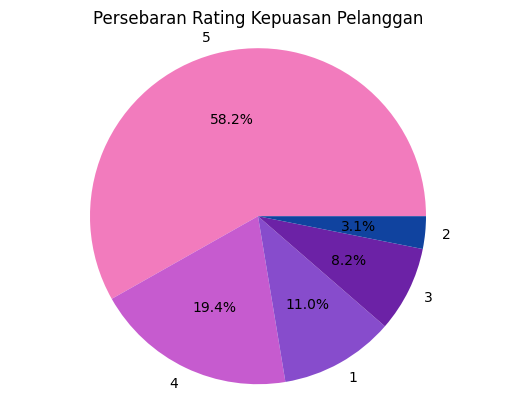

In [162]:
count_review_df = all_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

labels = count_review_df.index
sizes = count_review_df.values
colors=["#F27BBD", "#C65BCF", "#874CCC", "#6C22A6", "#10439F"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       colors=colors)

ax.axis('equal')
plt.title(label="Persebaran Rating Kepuasan Pelanggan")
plt.show()

Sehingga, didapatkan bahwa persebaran kepuasan pelanggan terhadap produk yang disediakan ialah:
- 57.8% untuk skor 5 atau dapat disebut sangat puas
- 19.4% untuk skor 4 atau dapat disebut puas
- 8.2% untuk skor 3 atau dapat disebut cukup
- 3.1% untuk skor 2 atau dapat disebut kurang puas
- 11.5% untuk skor 1 atau dapat dsebut tidak puas



### Pertanyaan 2: Bagaimana tingkat pemasukan dari tahun ke tahun dan bulan?

In [163]:
monthly_income_df = all_df.resample(rule='M', on='shipping_limit_date').agg({
    "order_id" : "nunique",
    "price" : "sum"
})
monthly_income_df.index = monthly_income_df.index.strftime('%Y-%m')
monthly_income_df = monthly_income_df.reset_index()
monthly_income_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_income_df.head()

<ipython-input-163-177422649d1f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income_df = all_df.resample(rule='M', on='shipping_limit_date').agg({


,shipping_limit_date,order_count,revenue
0,2016-09,2,194.47
1,2016-10,304,48910.79
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,567,80173.32


###Berdasarkan Tahun

<ipython-input-164-bf5b6fcf31b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-164-bf5b6fcf31b3>:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

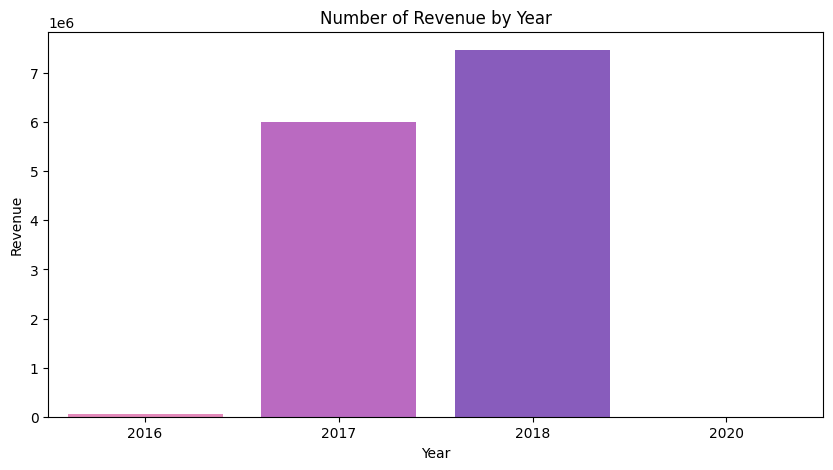

In [164]:
byyear_df = all_df.groupby(by=all_df["shipping_limit_date"].dt.year).price.sum().reset_index()
byyear_df.rename(columns={
    "price": "revenue",
    "shipping_limit_date": "year"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="revenue",
    x="year",
    data=byyear_df.sort_values(by="year", ascending=False),
    palette=colors
)

plt.title("Number of Revenue by Year")
plt.ylabel("Revenue")
plt.xlabel("Year")
plt.show()

###Berdasarkan Bulan

<ipython-input-165-d49de51388ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-165-d49de51388ef>:9: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = groupe

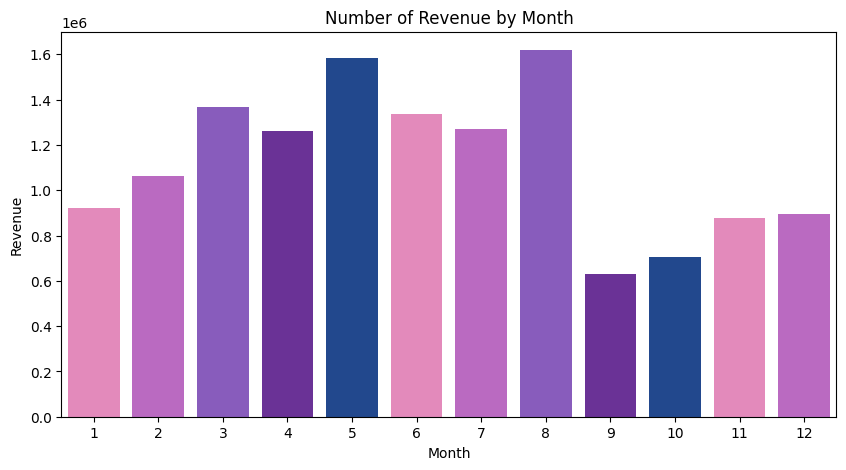

In [165]:
bymonth_df = all_df.groupby(by=all_df["shipping_limit_date"].dt.month).price.sum().reset_index()
bymonth_df.rename(columns={
    "price": "revenue",
    "shipping_limit_date": "month"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="revenue",
    x="month",
    data=bymonth_df.sort_values(by="month", ascending=False),
    palette=colors
)

plt.title("Number of Revenue by Month")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

Sehingga didapatkan bahwa berdasarkan tahun, terdapat kenaikan pemasukan yang signifikan. Sedangkan berdasarkan bulan, kenaikan pemasukan terjadi pada bulan Februari, Maret, Mei, Agustus, Oktober, dan November, sementara penurunan pemasukan terjadi pada bulan April, Juni, Juli, dan September.

**Insight:**
- Melihat data persebaran kepuasan pelanggan, pelanggan cenderung puas dengan pembelian mereka di E-Commerce, dilihat berdasarkan persentase skor review 4 dan 5 yang lebih banyak dibandingkan skor review lainnya.
- Melihat data tingkat pemasukan dari tahun ke tahun, pemasukan E-Commerce cenderung meningkat setiap tahunnya.

In [166]:
all_df.to_csv("all_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
  Sebagian besar pelanggan puas dengan produk yang dibeli di E-Commerce dengan urutan persebaran kepuasan ialah skor 5, 4, 1, 3, dan 2.
- Conclution pertanyaan 2:
  Pada tahun ke tahun, pemasukan E-Commerce meningkat setiap tahunnya. Berdasarkan bulan, kenaikan pemasukan terjadi pada bulan Februari, Maret, Mei, Agustus, Oktober, dan November, sementara penurunan pemasukan terjadi pada bulan April, Juni, Juli, dan September.